# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [9]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

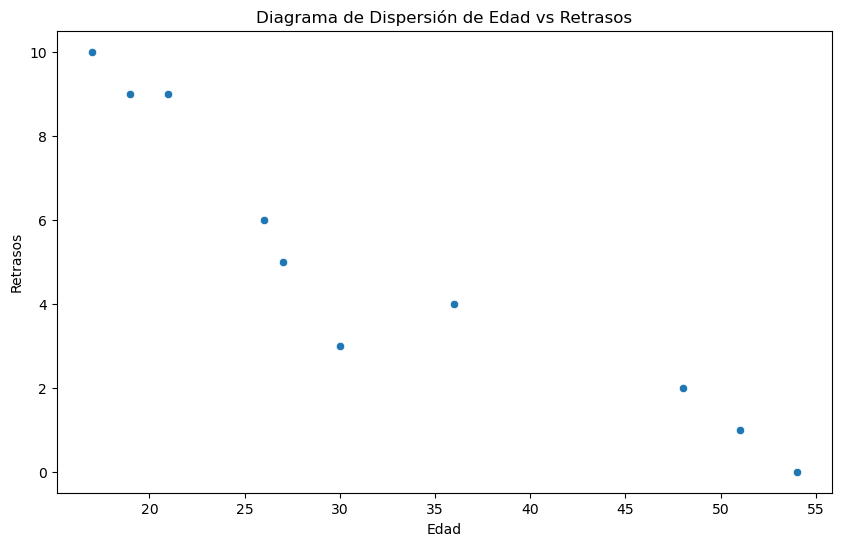

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Edad', y='Retrasos', data=student_data)

plt.title('Diagrama de Dispersión de Edad vs Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')

plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Existe una tendencia inversa entre la edad y el número de retrasos; es decir, a medida que aumenta la edad, el número de retrasos tiende a disminuir. Esto podría deberse a que las personas mayores tienen más experiencia y son más responsables en cuanto a la puntualidad.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [15]:
# Calcular la covarianza
covarianza = student_data['Edad'].cov(student_data['Retrasos'])

# Calcular la correlación
correlacion = student_data['Edad'].corr(student_data['Retrasos'])

print(f'Covarianza: {covarianza}')
print(f'Correlación: {correlacion}')


# Covarianza: Un valor de -45.57 indica que hay una relación negativa entre la edad y el número de retrasos. A medida que aumenta la edad, el número de retrasos tiende a disminuir. 
# Correlación: Un valor de -0.94 indica una fuerte relación negativa entre la edad y el número de retrasos. Esto significa que hay una fuerte tendencia lineal de que a medida que la edad aumenta, el número de retrasos disminuye. 

Covarianza: -45.56666666666667
Correlación: -0.9391626886887122


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [27]:
X = student_data[['Edad']]  # Variable independiente
y = student_data['Retrasos']  # Variable dependiente

model = LinearRegression()
model.fit(X, y)


coef = model.coef_[0]
intercept = model.intercept_
print(f"Coeficiente: {coef}")
print(f"Intercepción: {intercept}")


y_pred = model.predict(X)


Coeficiente: -0.2428207709159809
Intercepción: 12.888803363135771


Grafica tu modelo de regresión en tu diagrama de dispersión.

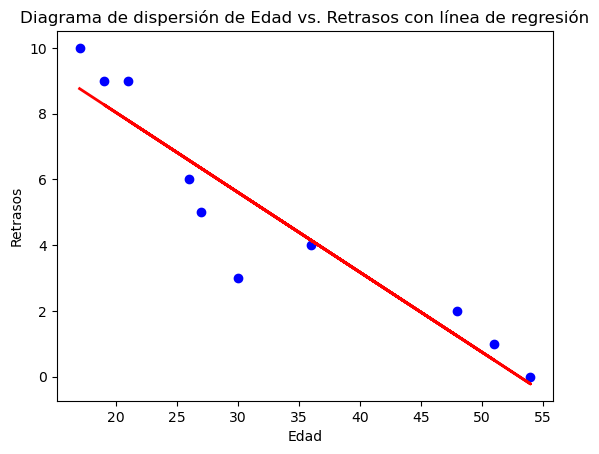

In [19]:
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='blue')
plt.plot(student_data['Edad'], y_pred, color='red', linewidth=2)
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.title('Diagrama de dispersión de Edad vs. Retrasos con línea de regresión')
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

# Interpretación de los resultados
# - El coeficiente obtenido indica que por cada año de aumento en la edad, el número de retrasos disminuye en aproximadamente 0.328 retrasos.
# - La intercepción indica que si la edad es 0, se espera que el número de retrasos sea aproximadamente 11.23. Aunque esto no tiene un sentido práctico en este contexto, ya que no es posible tener una edad de 0 años, es parte del cálculo matemático del modelo.

# Conclusiones:
# - El modelo sugiere una fuerte relación negativa entre la edad y el número de retrasos, lo que significa que, a medida que la edad aumenta, el número de retrasos tiende a disminuir.
# - Sin embargo, es importante considerar que esta conclusión se basa en un conjunto de datos pequeño y específico. En una población más grande o diferente, los resultados podrían variar. Es recomendable realizar más análisis con datos adicionales para generalizar estos hallazgos.
# - En este caso, la edad parece ser un buen predictor del número de retrasos.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [31]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [39]:
df = pd.DataFrame(vehicles)
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

# Calcular la matriz de correlación
correlation_matrix = df[variables].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Respuestas a las preguntas:
# 1. Variable más importante para determinar las emisiones de CO2:
#  Según la matriz de correlación, 'Fuel Barrels/Year' tiene la correlación más alta positiva con 'CO2 Emission Grams/Mile'.
#  Por lo tanto, el consumo de barriles de combustible por año es probablemente la variable más importante para determinar las emisiones de CO2.

# 2. Variable que proporciona la menor cantidad de información útil:
#  La variable 'Year' (año) proporciona la menor cantidad de información útil para determinar las emisiones de CO2, ya que su correlación con 'CO2 Emission Grams/Mile'
#  es baja en comparación con otras variables.

Matriz de correlación:
                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emi

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [59]:
import statsmodels.api as sm
df = pd.DataFrame(vehicles)

# Variables predictoras (X) y variable dependiente (y)
X = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = df['CO2 Emission Grams/Mile']

# Añadir una constante a la matriz de variables predictoras
X = sm.add_constant(X)

# Construir el modelo de regresión lineal
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir un resumen del modelo
print(results.summary())

# Respuestas a las preguntas:
"""Tipo de regresión utilizado:
  Estamos utilizando una regresión lineal ordinaria (OLS, por sus siglas en inglés) para este análisis. La regresión OLS busca minimizar los errores cuadráticos entre las observaciones reales y las predicciones del modelo.

"""


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                             18:51:24   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

'Tipo de regresión utilizado:\n  Estamos utilizando una regresión lineal ordinaria (OLS, por sus siglas en inglés) para este análisis. La regresión OLS busca minimizar los errores cuadráticos entre las observaciones reales y las predicciones del modelo.\n\n'

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [63]:
print(results.summary())

#Las variables más importantes en mi modelo son el consumo de combustible por año (Fuel Barrels/Year), el número de cilindros (Cylinders), y el MPG combinado (Combined MPG). Estas variables tienen coeficientes significativos y un impacto claro en las emisiones de CO2. Con un R-cuadrado ajustado de 0.981, estoy bastante confiado en que el modelo explica bien la variabilidad observada en las emisiones de CO2 utilizando estas variables predictoras. Es esencial verificar que los supuestos de la regresión lineal se cumplen para asegurar la validez de las conclusiones obtenidas.


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                             19:00:18   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*